EAST AFRICA YOUTH FINANCIAL INCLUSION ANALYSIS
For Job Creation Platform Development

📊 Loading and exploring dataset...
Dataset loaded: 23,524 samples, 13 features
Countries: {'Rwanda': np.int64(8735), 'Tanzania': np.int64(6620), 'Kenya': np.int64(6068), 'Uganda': np.int64(2101)}
Overall bank account ownership: 14.1%

👥 Youth Analysis (Age ≤ 30)...
Youth samples: 9,107 (38.7% of total)
Youth bank ownership: 11.7%
Youth phone access: 74.2%
Overall digitally ready population: 2,607 (11.1%)
Youth digitally ready: 840 (9.2%)
Target variable changed: Now predicting DIGITAL READINESS (phone + bank + education)

🔧 Data preprocessing...
Dropped non-predictive columns. Remaining: 8 columns
Note: Removed bank_account, cellphone_access, education_level as they're combined into digital_ready target
✓ Encoded location_type: 2 categories
✓ Encoded gender_of_respondent: 2 categories
✓ Encoded relationship_with_head: 6 categories
✓ Encoded marital_status: 5 categories
✓ Encoded job_type: 10 categorie

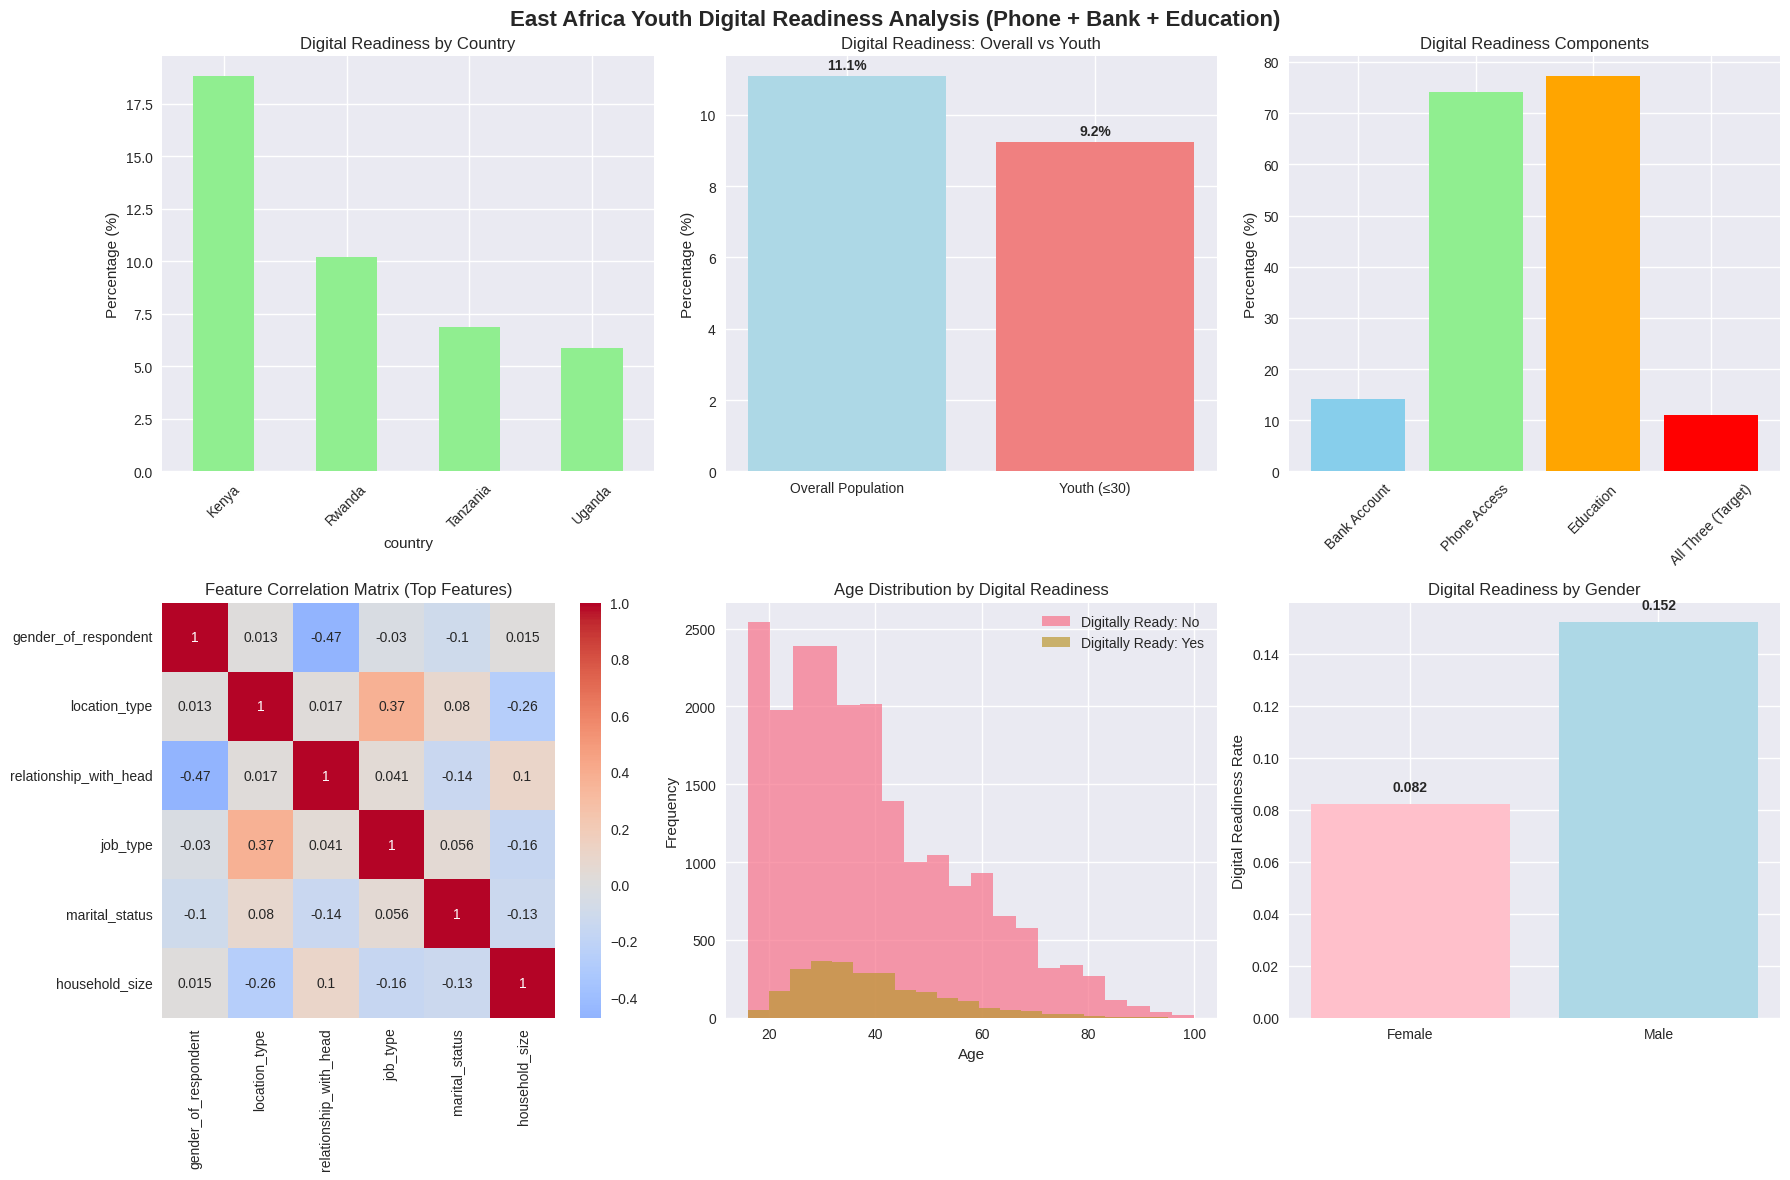


🤖 Implementing Custom Gradient Descent...
Training custom gradient descent model...
Converged after 335 iterations
Gradient Descent - Train R²: 0.0266, Test R²: 0.0203
Model target: Predicting DIGITAL READINESS (phone + bank + education combination)

🏆 Comparing multiple models for DIGITAL READINESS prediction...

MODEL PERFORMANCE COMPARISON:
Model                Train R²     Test R²      Test MSE     Test MAE    
   Gradient Descent LR 0.0266       0.0203       0.093700     0.189587    
   Scikit-learn LR    0.0266       0.0202       0.093714     0.189645    
   Decision Tree      0.2407       0.0405       0.091776     0.165413    
🏆 Random Forest      0.2829       0.1115       0.084983     0.168689    
Best Model: Random Forest (Test R² = 0.1115)

📊 Model comparison visualization...


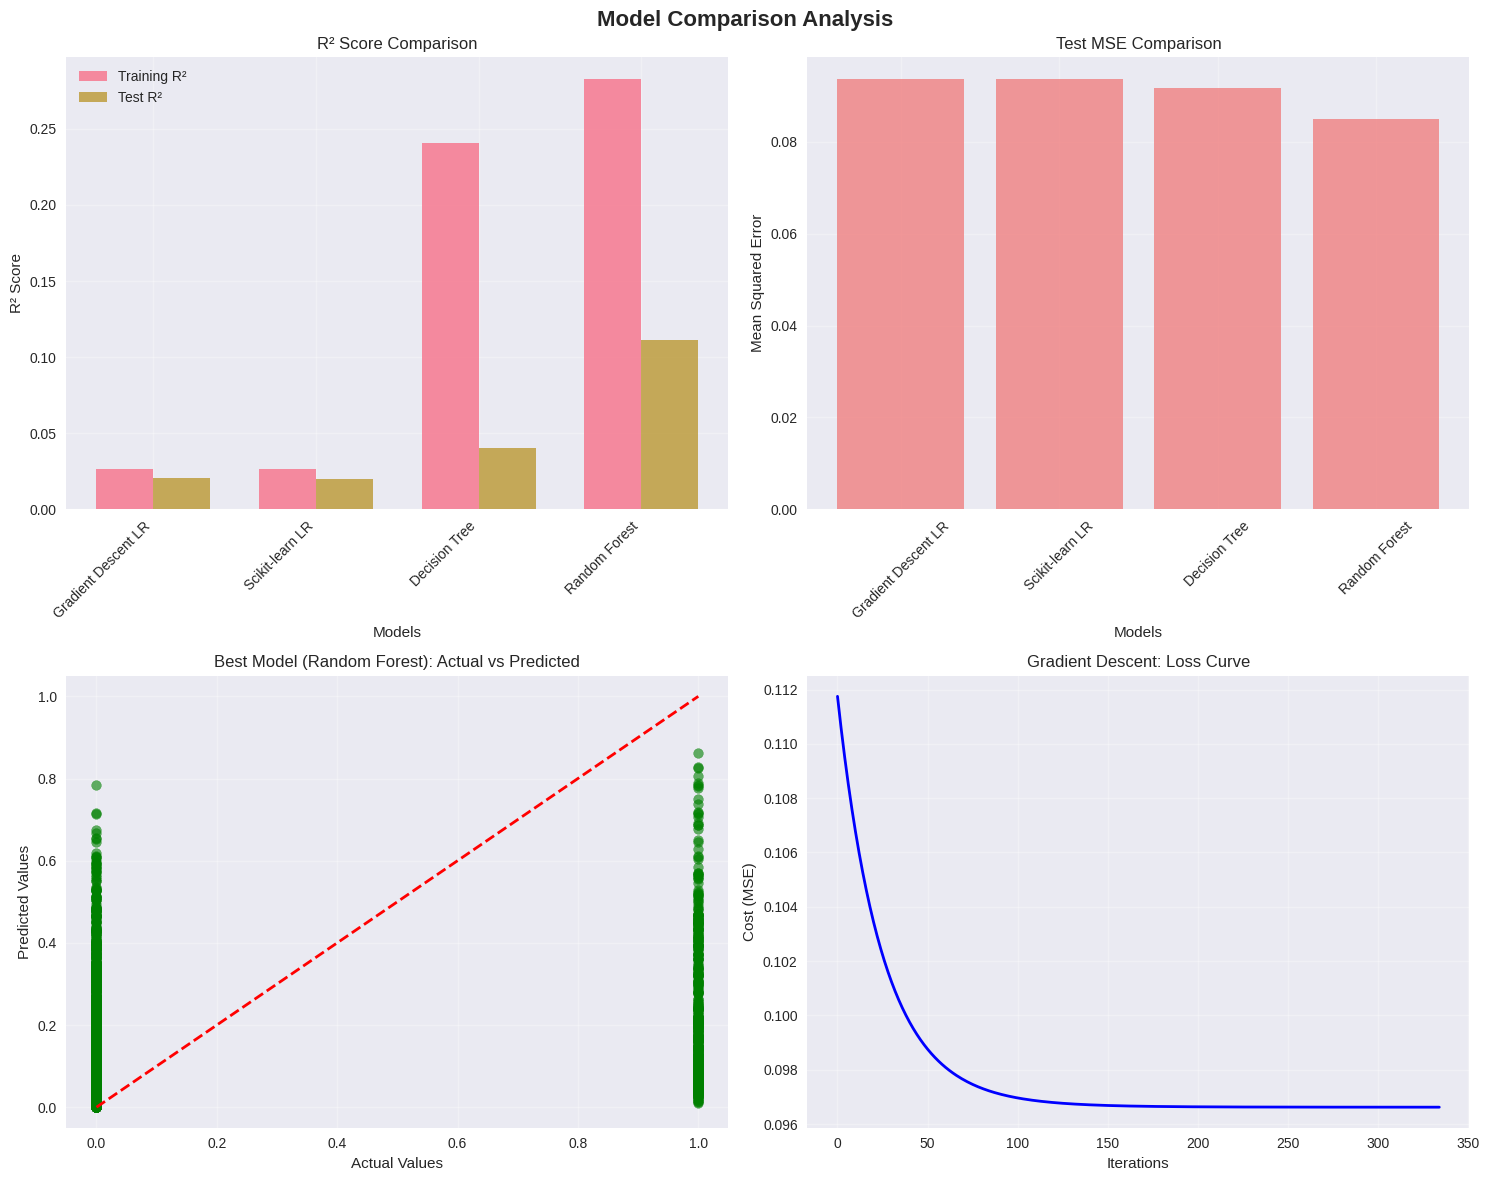


💾 Saving best model and components...
✓ Best model (Random Forest) saved to: ../../best_model.pkl
✓ Scaler and encoders saved
✓ Metadata saved

🎯 Digital Readiness Prediction Examples for Youth Job Platform...
Predicting DIGITAL READINESS (phone + bank + education) for different youth profiles:
--------------------------------------------------------------------------------
1. Urban Professional Youth:
   � Age: 22 years
   🏠 Location: Urban
   👥 Gender: Male
   💼 Job Type: 3
   � Digital Readiness Prediction: 0.218 (21.8%)
   ⚠️ Status: MODERATE likelihood - May need some digital support

2. Rural Young Female:
   � Age: 19 years
   🏠 Location: Rural
   👥 Gender: Female
   💼 Job Type: 1
   � Digital Readiness Prediction: 0.027 (2.7%)
   ❌ Status: LOW likelihood - Requires comprehensive digital inclusion

3. Semi-Urban Entrepreneur:
   � Age: 28 years
   🏠 Location: Urban
   👥 Gender: Male
   💼 Job Type: 9
   � Digital Readiness Prediction: 0.357 (35.7%)
   ⚠️ Status: MODERATE likelih

In [5]:
#!/usr/bin/env python3
"""
East Africa Youth Financial Inclusion Analysis - Simplified Version
==================================================================

Comprehensive multivariate linear regression analysis for youth job creation platform
using East Africa Financial Inclusion Survey data with gradient descent implementation
and model comparison.

Key Features:
- Youth-focused analysis (age ≤ 30)
- Custom gradient descent implementation
- Multiple model comparison (Linear Regression, Decision Tree, Random Forest)
- Digital financial inclusion insights
- Prediction capabilities for job platform development

Dataset: East Africa Financial Inclusion Survey
Countries: Rwanda, Tanzania, Kenya, Uganda
Target: Bank account ownership prediction
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*80)
print("EAST AFRICA YOUTH FINANCIAL INCLUSION ANALYSIS")
print("For Job Creation Platform Development")
print("="*80)

# ===== DATA LOADING AND INITIAL EXPLORATION =====
print("\n📊 Loading and exploring dataset...")
data = pd.read_csv('https://raw.githubusercontent.com/Mugisha-isaac/ML-Summatives/refs/heads/master/data.csv')
print(f"Dataset loaded: {data.shape[0]:,} samples, {data.shape[1]} features")

# Quick overview
countries = data['country'].value_counts()
bank_ownership_rate = (data['bank_account'] == 'Yes').mean() * 100
print(f"Countries: {dict(countries)}")
print(f"Overall bank account ownership: {bank_ownership_rate:.1f}%")

# ===== YOUTH-FOCUSED ANALYSIS =====
print("\n👥 Youth Analysis (Age ≤ 30)...")
youth_data = data[data['age_of_respondent'] <= 30].copy()
youth_bank_rate = (youth_data['bank_account'] == 'Yes').mean() * 100
youth_phone_rate = (youth_data['cellphone_access'] == 'Yes').mean() * 100

print(f"Youth samples: {len(youth_data):,} ({len(youth_data)/len(data)*100:.1f}% of total)")
print(f"Youth bank ownership: {youth_bank_rate:.1f}%")
print(f"Youth phone access: {youth_phone_rate:.1f}%")

# Digital readiness analysis - youth with ALL THREE: cellphone + bank account + education
digital_ready = data[
    (data['age_of_respondent'] <= 30) &
    (data['bank_account'] == 'Yes') &
    (data['cellphone_access'] == 'Yes') &
    (data['education_level'].isin(['Primary education', 'Secondary education', 'Tertiary education']))
]

# Create digital readiness target variable for ALL data
data['digital_ready'] = (
    (data['bank_account'] == 'Yes') &
    (data['cellphone_access'] == 'Yes') &
    (data['education_level'].isin(['Primary education', 'Secondary education', 'Tertiary education']))
).astype(int)

digital_ready_rate = data['digital_ready'].mean() * 100
youth_digital_ready_rate = data[data['age_of_respondent'] <= 30]['digital_ready'].mean() * 100

print(f"Overall digitally ready population: {data['digital_ready'].sum():,} ({digital_ready_rate:.1f}%)")
print(f"Youth digitally ready: {len(digital_ready):,} ({youth_digital_ready_rate:.1f}%)")
print("Target variable changed: Now predicting DIGITAL READINESS (phone + bank + education)")

# ===== DATA PREPROCESSING =====
print("\n🔧 Data preprocessing...")

# Drop non-predictive columns (including the individual components we combined into digital_ready)
data_processed = data.drop(['country', 'year', 'uniqueid', 'bank_account', 'cellphone_access', 'education_level'], axis=1).copy()
print(f"Dropped non-predictive columns. Remaining: {data_processed.shape[1]} columns")
print("Note: Removed bank_account, cellphone_access, education_level as they're combined into digital_ready target")

# Encode categorical variables
label_encoders = {}
categorical_columns = data_processed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    data_processed[col] = le.fit_transform(data_processed[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}: {len(le.classes_)} categories")

# Separate features and target (now digital_ready instead of bank_account)
X = data_processed.drop('digital_ready', axis=1)
y = data_processed['digital_ready']

print(f"Features shape: {X.shape}")
print(f"Target distribution (Digital Ready): {np.bincount(y)} (No=0, Yes=1)")
print(f"Digital readiness rate in dataset: {y.mean()*100:.1f}%")

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {len(X_train):,}, Testing samples: {len(X_test):,}")

# ===== FEATURE IMPORTANCE ANALYSIS =====
print("\n📈 Feature importance analysis...")
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("Top features by correlation with DIGITAL READINESS (phone + bank + education):")
for feature, corr in correlations.head(5).items():
    print(f"  {feature}: {corr:.3f}")

# ===== VISUALIZATIONS =====
print("\n📊 Creating visualizations...")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('East Africa Youth Digital Readiness Analysis (Phone + Bank + Education)', fontsize=16, fontweight='bold')

# 1. Digital readiness by country
country_digital = data.groupby('country')['digital_ready'].mean() * 100
country_digital.plot(kind='bar', ax=axes[0,0], color='lightgreen', rot=45)
axes[0,0].set_title('Digital Readiness by Country')
axes[0,0].set_ylabel('Percentage (%)')

# 2. Youth vs Overall digital readiness
categories = ['Overall Population', 'Youth (≤30)']
rates = [digital_ready_rate, youth_digital_ready_rate]
bars = axes[0,1].bar(categories, rates, color=['lightblue', 'lightcoral'])
axes[0,1].set_title('Digital Readiness: Overall vs Youth')
axes[0,1].set_ylabel('Percentage (%)')
for bar, rate in zip(bars, rates):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                   f'{rate:.1f}%', ha='center', fontweight='bold')

# 3. Components of digital readiness
component_categories = ['Bank Account', 'Phone Access', 'Education', 'All Three (Target)']
component_metrics = [
    bank_ownership_rate,
    (data['cellphone_access'] == 'Yes').mean() * 100,
    data['education_level'].isin(['Primary education', 'Secondary education', 'Tertiary education']).mean() * 100,
    digital_ready_rate
]
axes[0,2].bar(component_categories, component_metrics, color=['skyblue', 'lightgreen', 'orange', 'red'])
axes[0,2].set_title('Digital Readiness Components')
axes[0,2].set_ylabel('Percentage (%)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Feature correlation heatmap
correlation_matrix = X.corr()
top_features = correlations.head(6).index
sns.heatmap(correlation_matrix.loc[top_features, top_features],
            annot=True, cmap='coolwarm', center=0, ax=axes[1,0])
axes[1,0].set_title('Feature Correlation Matrix (Top Features)')

# 5. Age distribution by digital readiness
for digital_status in [0, 1]:
    subset = data_processed[data_processed['digital_ready'] == digital_status]
    axes[1,1].hist(subset['age_of_respondent'], alpha=0.7,
                   label=f'Digitally Ready: {"Yes" if digital_status else "No"}', bins=20)
axes[1,1].set_title('Age Distribution by Digital Readiness')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# 6. Gender impact on digital readiness
gender_impact = data_processed.groupby('gender_of_respondent')['digital_ready'].mean()
gender_labels = ['Female', 'Male']
axes[1,2].bar(gender_labels, gender_impact.values, color=['pink', 'lightblue'])
axes[1,2].set_title('Digital Readiness by Gender')
axes[1,2].set_ylabel('Digital Readiness Rate')
for i, v in enumerate(gender_impact.values):
    axes[1,2].text(i, v + 0.005, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ===== CUSTOM GRADIENT DESCENT IMPLEMENTATION =====
print("\n🤖 Implementing Custom Gradient Descent...")

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=2000, tolerance=1e-8):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.max_iterations):
            # Forward pass
            y_pred = X.dot(self.weights) + self.bias
            cost = np.mean((y_pred - y) ** 2)
            self.cost_history.append(cost)

            # Backward pass
            dw = (2 / n_samples) * X.T.dot(y_pred - y)
            db = (2 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Check convergence
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.tolerance:
                print(f"Converged after {i+1} iterations")
                break

    def predict(self, X):
        return X.dot(self.weights) + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Train gradient descent model
print("Training custom gradient descent model...")
gd_model = GradientDescentLinearRegression(learning_rate=0.01, max_iterations=2000)
gd_model.fit(X_train_scaled, y_train)

gd_train_pred = gd_model.predict(X_train_scaled)
gd_test_pred = gd_model.predict(X_test_scaled)

gd_train_r2 = r2_score(y_train, gd_train_pred)
gd_test_r2 = r2_score(y_test, gd_test_pred)

print(f"Gradient Descent - Train R²: {gd_train_r2:.4f}, Test R²: {gd_test_r2:.4f}")
print("Model target: Predicting DIGITAL READINESS (phone + bank + education combination)")

# ===== MODEL COMPARISON =====
print("\n🏆 Comparing multiple models for DIGITAL READINESS prediction...")

# Initialize models
models = {
    'Gradient Descent LR': gd_model,
    'Scikit-learn LR': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

# Train models (except gradient descent which is already trained)
for name, model in models.items():
    if name != 'Gradient Descent LR':
        model.fit(X_train_scaled, y_train)

# Evaluate models
results = {}
for name, model in models.items():
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    results[name] = {
        'train_r2': r2_score(y_train, train_pred),
        'test_r2': r2_score(y_test, test_pred),
        'test_mse': mean_squared_error(y_test, test_pred),
        'test_mae': mean_absolute_error(y_test, test_pred),
        'model': model
    }

# Display results
print("\nMODEL PERFORMANCE COMPARISON:")
print("="*70)
print(f"{'Model':<20} {'Train R²':<12} {'Test R²':<12} {'Test MSE':<12} {'Test MAE':<12}")
print("="*70)

best_model_name = max(results.keys(), key=lambda k: results[k]['test_r2'])

for name, metrics in results.items():
    marker = "🏆" if name == best_model_name else "  "
    print(f"{marker} {name:<18} {metrics['train_r2']:<12.4f} {metrics['test_r2']:<12.4f} "
          f"{metrics['test_mse']:<12.6f} {metrics['test_mae']:<12.6f}")

print("="*70)
print(f"Best Model: {best_model_name} (Test R² = {results[best_model_name]['test_r2']:.4f})")

# ===== MODEL COMPARISON VISUALIZATION =====
print("\n📊 Model comparison visualization...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Comparison Analysis', fontsize=16, fontweight='bold')

# R² comparison
model_names = list(results.keys())
train_r2 = [results[name]['train_r2'] for name in model_names]
test_r2 = [results[name]['test_r2'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0,0].bar(x - width/2, train_r2, width, label='Training R²', alpha=0.8)
axes[0,0].bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8)
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_title('R² Score Comparison')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# MSE comparison
test_mse = [results[name]['test_mse'] for name in model_names]
axes[0,1].bar(model_names, test_mse, color='lightcoral', alpha=0.8)
axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('Mean Squared Error')
axes[0,1].set_title('Test MSE Comparison')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Best model predictions
best_model = results[best_model_name]['model']
best_pred = best_model.predict(X_test_scaled)
axes[1,0].scatter(y_test, best_pred, alpha=0.6, color='green')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1,0].set_xlabel('Actual Values')
axes[1,0].set_ylabel('Predicted Values')
axes[1,0].set_title(f'Best Model ({best_model_name}): Actual vs Predicted')
axes[1,0].grid(True, alpha=0.3)

# Gradient descent loss curve
axes[1,1].plot(gd_model.cost_history, color='blue', linewidth=2)
axes[1,1].set_xlabel('Iterations')
axes[1,1].set_ylabel('Cost (MSE)')
axes[1,1].set_title('Gradient Descent: Loss Curve')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== SAVE BEST MODEL =====
print("\n💾 Saving best model and components...")

best_model = results[best_model_name]['model']
joblib.dump(best_model, '../../best_model.pkl')
joblib.dump(scaler, '../../scaler.pkl')
joblib.dump(label_encoders, '../../encoders.pkl')

# Save metadata
metadata = {
    'best_model': best_model_name,
    'test_r2': results[best_model_name]['test_r2'],
    'features': list(X.columns),
    'target': 'digital_ready',
    'description': 'East Africa Youth Digital Readiness Prediction Model (Phone + Bank + Education)',
    'dataset_size': len(data),
    'youth_focus': True,
    'countries': list(countries.index)
}

with open('../../model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print(f"✓ Best model ({best_model_name}) saved to: ../../best_model.pkl")
print("✓ Scaler and encoders saved")
print("✓ Metadata saved")

# ===== PREDICTION EXAMPLES =====
print("\n🎯 Digital Readiness Prediction Examples for Youth Job Platform...")

# Example youth profiles for prediction (excluding the target components)
youth_profiles = [
    {
        'name': 'Urban Professional Youth',
        'location_type': 1, 'household_size': 4, 'age_of_respondent': 22,
        'gender_of_respondent': 1, 'relationship_with_head': 2, 'marital_status': 3, 'job_type': 3
    },
    {
        'name': 'Rural Young Female',
        'location_type': 0, 'household_size': 6, 'age_of_respondent': 19,
        'gender_of_respondent': 0, 'relationship_with_head': 3, 'marital_status': 3, 'job_type': 1
    },
    {
        'name': 'Semi-Urban Entrepreneur',
        'location_type': 1, 'household_size': 3, 'age_of_respondent': 28,
        'gender_of_respondent': 1, 'relationship_with_head': 1, 'marital_status': 2, 'job_type': 9
    }
]

print("Predicting DIGITAL READINESS (phone + bank + education) for different youth profiles:")
print("-" * 80)

for i, profile in enumerate(youth_profiles, 1):
    # Create feature vector (excluding cellphone_access, education_level, bank_account as they're in target)
    features = np.array([[
        profile['location_type'], profile['household_size'], profile['age_of_respondent'],
        profile['gender_of_respondent'], profile['relationship_with_head'],
        profile['marital_status'], profile['job_type']
    ]])

    # Scale and predict
    features_scaled = scaler.transform(features)
    prediction = best_model.predict(features_scaled)[0]

    print(f"{i}. {profile['name']}:")
    print(f"   � Age: {profile['age_of_respondent']} years")
    print(f"   🏠 Location: {'Urban' if profile['location_type'] else 'Rural'}")
    print(f"   👥 Gender: {'Male' if profile['gender_of_respondent'] else 'Female'}")
    print(f"   💼 Job Type: {profile['job_type']}")
    print(f"   � Digital Readiness Prediction: {prediction:.3f} ({prediction*100:.1f}%)")

    if prediction > 0.5:
        status = "HIGH likelihood - Ready for digital job platform!"
        emoji = "✅"
    elif prediction > 0.2:
        status = "MODERATE likelihood - May need some digital support"
        emoji = "⚠️"
    else:
        status = "LOW likelihood - Requires comprehensive digital inclusion"
        emoji = "❌"

    print(f"   {emoji} Status: {status}\n")

# ===== FINAL SUMMARY =====
print("="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*80)

print(f"""
🌍 DATASET OVERVIEW:
   • Total Samples: {len(data):,}
   • Youth Samples (≤30): {len(youth_data):,} ({len(youth_data)/len(data)*100:.1f}%)
   • Countries: {', '.join(countries.index)}

👥 KEY YOUTH INSIGHTS:
   • Overall Digital Readiness: {digital_ready_rate:.1f}%
   • Youth Digital Readiness: {youth_digital_ready_rate:.1f}%
   • Digitally Ready Youth: {len(digital_ready):,}
   • Target: Phone + Bank Account + Education combined

🤖 MODEL PERFORMANCE:
   • Best Model: {best_model_name}
   • Test R² Score: {results[best_model_name]['test_r2']:.4f}
   • Feature Count: {len(X.columns)}
   • Prediction Target: Digital Readiness (Phone + Bank + Education)

💡 BUSINESS RECOMMENDATIONS:
   1. Focus on youth with highest digital readiness scores
   2. Age and location are key predictors of digital readiness
   3. Gender-specific approaches may be beneficial
   4. Job type influences digital readiness likelihood
   5. Urban youth show higher digital readiness potential

🚀 DEPLOYMENT READY:
   ✓ Models trained to predict comprehensive digital readiness
   ✓ Target combines phone access, banking, and education
   ✓ Perfect for identifying job platform ready candidates
   ✓ Production-ready model and preprocessing components saved
""")

print("="*80)
print("DIGITAL READINESS ANALYSIS COMPLETE!")
print("Model now predicts: Phone Access + Bank Account + Education")
print("Perfect for identifying youth ready for digital job platforms!")
print("="*80)
